In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pywaffle import Waffle
import numpy as np
import math
import itertools

In [2]:
prec = 0.87
recall = 0.37

In [3]:
# (prec - 1) * tp + prec * fp = 0
#(recall - 1) * tp + recall * fn = 0 
# tp + fp + fn + tn = 1

In [172]:
y_true = [0, 0, 1, 1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 0, 0]
cm = confusion_matrix(y_true, y_pred)

In [173]:
cm

array([[4, 1],
       [2, 2]])

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


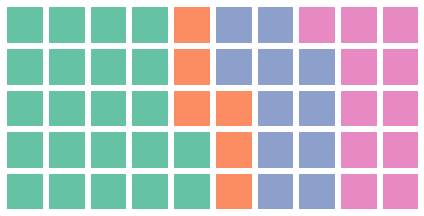

In [6]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  # Either rows or columns could be omitted
    values=cm.ravel()
)
fig.show()

In [7]:
tn, fp, fn, tp = cm.ravel()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


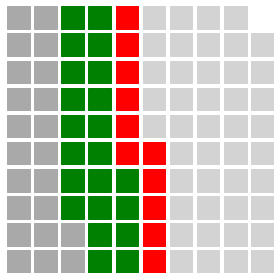

In [8]:
reordered = [fn, tp, fp, tn]
colors=["darkgrey", "green", "red", "lightgrey"]
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,  # Either rows or columns could be omitted
    values=reordered,
    colors=["darkgrey", "green", "red", "lightgrey"]
)
fig.show()

<class 'pywaffle.waffle.Waffle'>


/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


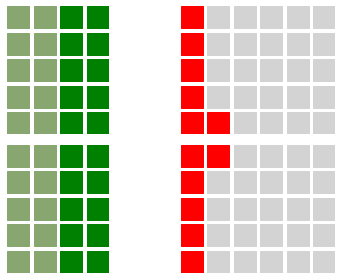

In [9]:
reordered = [fn, tp, fp, tn]
colors=["#88a770", "green", "red", "lightgrey"]

rows = 10
cols = 10
col_ratio = (fn+tp)/sum(reordered)
col_part = int(round(cols * col_ratio))

fig = plt.figure(
    FigureClass=Waffle,
    rows=rows // 2,
      # Either rows or columns could be omitted
    plots = {
        "221": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "NW",
            "colors": colors[:2],
            "columns": col_part,
        },
        "223": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "SW",
            "colors": colors[:2],
            "columns": col_part,
        },
        
        "222": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "SW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        "224": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "NW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        
    },
    #values=[fn/2, tp/2],
    
    vertical=False,
)

print(fig.__class__)

fig.show()

(14, 14)
h = 13
tp_boxes = 44
 0, 9 1
 1, 9 2
 2, 9 3
 3, 9 4
 4, 9 5
 5, 9 6
 6, 9 7
 7, 9 8
 8, 9 9
 9, 9 10
 10, 9 11
 11, 9 12
 12, 9 13
 0, 8 14
 1, 8 15
 2, 8 16
 3, 8 17
 4, 8 18
 5, 8 19
 6, 8 20
 7, 8 21
 8, 8 22
 9, 8 23
 10, 8 24
 11, 8 25
 12, 8 26
 0, 7 27
 1, 7 28
 2, 7 29
 3, 7 30
 4, 7 31
 5, 7 32
 6, 7 33
 7, 7 34
 8, 7 35
 9, 7 36
 10, 7 37
 11, 7 38
 12, 7 39
 0, 6 40
 1, 6 41
 2, 6 42
 3, 6 43
 4, 6 44
 5, 6 45
 6, 6 46
 7, 6 47
 8, 6 48
 9, 6 49
 10, 6 50
 11, 6 51
 12, 6 52
 0, 5 53
 1, 5 54
 2, 5 55
 3, 5 56
 4, 5 57
 5, 5 58
 6, 5 59
 7, 5 60
 8, 5 61
 9, 5 62
 10, 5 63
 11, 5 64
 12, 5 65
 0, 4 66
 1, 4 67
 2, 4 68
 3, 4 69
 4, 4 70
 5, 4 71
 6, 4 72
 7, 4 73
fp_boxes = 79
 0, 7 1
 1, 7 2
 2, 7 3
 3, 7 4
 4, 7 5
 5, 7 6
 6, 7 7
 7, 7 8
 8, 7 9
 9, 7 10
 10, 7 11
 11, 7 12
 12, 7 13
 0, 8 14
 1, 8 15
 2, 8 16
 3, 8 17
 4, 8 18
 5, 8 19
 6, 8 20
 7, 8 21
 8, 8 22
 9, 8 23
 10, 8 24
 11, 8 25
 12, 8 26
 0, 9 27
 1, 9 28
 2, 9 29
 3, 9 30
 4, 9 31
 5, 9 32
 6, 9 33

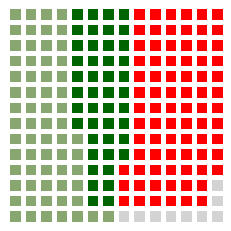

In [206]:

def build_waffle_matrix(size, confusion_matrix):
    rows, cols = size
    print(f"{size}")
    hmap = np.ones( (rows, cols) )
    tn, fp, fn, tp = cm.ravel()
    col_ratio = (fn+tp)/sum(cm.ravel())
    col_part = cols * col_ratio
    fn_tp_boxes = (fn+tp) * cols * rows // sum(cm.ravel())    

    for n in range(fn_tp_boxes, rows * cols):
        ix = n % rows
        iy = n // rows
        hmap[ix, iy] = 4
    normalize =  rows * cols / sum(cm.ravel())
    h = int(min(
        max( math.ceil(tp/col_part * normalize), 
            math.ceil(fp / (cols - col_part) * normalize )),
        rows))
    print(f"h = {h}")
    centery = int(round(col_part))
    centerx = int(round(rows / 2))

    midh = int(math.ceil(h/2))
    tp_boxes = int(round(tp * cols * rows / sum(cm.ravel())))
    fp_boxes = int(math.floor(fp * cols * rows / sum(cm.ravel())))

    def boxes_generator(direction=-1, expected_value=1):
        n = 0
        while (True):
            ix = centerx - midh + (n % (h))
            iy = centery + direction * (n// (h) -1)
            n += 1
            print(f" {ix}, {iy} {n}")            
            if hmap[ix, iy] == expected_value:
                yield ix, iy
                
    tp_boxes_gen = boxes_generator(direction=-1, expected_value=1)
    print(f"tp_boxes = {tp_boxes}")
    toUpdate = itertools.islice(tp_boxes_gen, tp_boxes)        
    for xy in toUpdate:
        ix, iy = xy
        assert(hmap[ix, iy] == 1)
        hmap[ix, iy] = 2
        
    fp_boxes_gen = boxes_generator(direction=1, expected_value=4)
    print(f"fp_boxes = {fp_boxes}")
    toUpdate = itertools.islice(fp_boxes_gen, fp_boxes)
    for xy in toUpdate:
        ix, iy = xy        
        assert(hmap[ix, iy] == 4)
        hmap[ix, iy] = 3
        
    return hmap

def plot_waffle_matrix(hmap, 
                       cmap = (mpl.colors.ListedColormap(["#88a770", "darkgreen", "red", "lightgrey"])), 
                       linewidth=5
                      ):
    fig, ax = plt.subplots()

    im = ax.imshow(hmap, cmap=cmap)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    unitmove = 1.0
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks(np.arange(hmap.shape[1]+unitmove)-unitmove/2, minor=True)
    ax.set_yticks(np.arange(hmap.shape[0]+unitmove)-unitmove/2, minor=True)
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=linewidth)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

hmap = build_waffle_matrix( (14, 14), cm)
plot_waffle_matrix(hmap)

(14, 14)
[[ 1 11]
 [ 9  6]]
(14, 14)
h = 13
tp_boxes = 44
 0, 9 1
 1, 9 2
 2, 9 3
 3, 9 4
 4, 9 5
 5, 9 6
 6, 9 7
 7, 9 8
 8, 9 9
 9, 9 10
 10, 9 11
 11, 9 12
 12, 9 13
 0, 8 14
 1, 8 15
 2, 8 16
 3, 8 17
 4, 8 18
 5, 8 19
 6, 8 20
 7, 8 21
 8, 8 22
 9, 8 23
 10, 8 24
 11, 8 25
 12, 8 26
 0, 7 27
 1, 7 28
 2, 7 29
 3, 7 30
 4, 7 31
 5, 7 32
 6, 7 33
 7, 7 34
 8, 7 35
 9, 7 36
 10, 7 37
 11, 7 38
 12, 7 39
 0, 6 40
 1, 6 41
 2, 6 42
 3, 6 43
 4, 6 44
 5, 6 45
 6, 6 46
 7, 6 47
 8, 6 48
 9, 6 49
 10, 6 50
 11, 6 51
 12, 6 52
 0, 5 53
 1, 5 54
 2, 5 55
 3, 5 56
 4, 5 57
 5, 5 58
 6, 5 59
 7, 5 60
 8, 5 61
 9, 5 62
 10, 5 63
 11, 5 64
 12, 5 65
 0, 4 66
 1, 4 67
 2, 4 68
 3, 4 69
 4, 4 70
 5, 4 71
 6, 4 72
 7, 4 73
fp_boxes = 79
 0, 7 1
 1, 7 2
 2, 7 3
 3, 7 4
 4, 7 5
 5, 7 6
 6, 7 7
 7, 7 8
 8, 7 9
 9, 7 10
 10, 7 11
 11, 7 12
 12, 7 13
 0, 8 14
 1, 8 15
 2, 8 16
 3, 8 17
 4, 8 18
 5, 8 19
 6, 8 20
 7, 8 21
 8, 8 22
 9, 8 23
 10, 8 24
 11, 8 25
 12, 8 26
 0, 9 27
 1, 9 28
 2, 9 29
 3, 9 3

[21.18918919 47.67567568 63.56756757 63.56756757]
[20, 48, 63, 65]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[ 2 11]
 [10  5]]
(14, 14)
h = 12
tp_boxes = 35
 1, 9 1
 2, 9 2
 3, 9 3
 4, 9 4
 5, 9 5
 6, 9 6
 7, 9 7
 8, 9 8
 9, 9 9
 10, 9 10
 11, 9 11
 12, 9 12
 1, 8 13
 2, 8 14
 3, 8 15
 4, 8 16
 5, 8 17
 6, 8 18
 7, 8 19
 8, 8 20
 9, 8 21
 10, 8 22
 11, 8 23
 12, 8 24
 1, 7 25
 2, 7 26
 3, 7 27
 4, 7 28
 5, 7 29
 6, 7 30
 7, 7 31
 8, 7 32
 9, 7 33
 10, 7 34
 11, 7 35
 12, 7 36
 1, 6 37
 2, 6 38
 3, 6 39
 4, 6 40
 5, 6 41
 6, 6 42
 7, 6 43
 8, 6 44
 9, 6 45
 10, 6 46
 11, 6 47
 12, 6 48
 1, 5 49
 2, 5 50
 3, 5 51
 4, 5 52
 5, 5 53
 6, 5 54
 7, 5 55
 8, 5 56
 9, 5 57
 10, 5 58
 11, 5 59
 12, 5 60
 1, 4 61
 2, 4 62
 3, 4 63
 4, 4 64
 5, 4 65
fp_boxes = 77
 1, 7 1
 2, 7 2
 3, 7 3
 4, 7 4
 5, 7 5
 6, 7 6
 7, 7 7
 8, 7 8
 9, 7 9
 10, 7 10
 11, 7 11
 12, 7 12
 1, 8 13
 2, 8 14
 3, 8 15
 4, 8 16
 5, 8 17
 6, 8 18
 7, 8 19
 8, 8 20
 9, 8 21
 10, 8 22
 11, 8 23
 12, 8 24
 1, 9 25
 2, 9 26
 

[62.72 78.4  23.52 31.36]
[63, 78, 23, 32]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[14  6]
 [ 2 12]]
(14, 14)
h = 12
tp_boxes = 69
 1, 7 1
 2, 7 2
 3, 7 3
 4, 7 4
 5, 7 5
 6, 7 6
 7, 7 7
 8, 7 8
 9, 7 9
 10, 7 10
 11, 7 11
 12, 7 12
 1, 6 13
 2, 6 14
 3, 6 15
 4, 6 16
 5, 6 17
 6, 6 18
 7, 6 19
 8, 6 20
 9, 6 21
 10, 6 22
 11, 6 23
 12, 6 24
 1, 5 25
 2, 5 26
 3, 5 27
 4, 5 28
 5, 5 29
 6, 5 30
 7, 5 31
 8, 5 32
 9, 5 33
 10, 5 34
 11, 5 35
 12, 5 36
 1, 4 37
 2, 4 38
 3, 4 39
 4, 4 40
 5, 4 41
 6, 4 42
 7, 4 43
 8, 4 44
 9, 4 45
 10, 4 46
 11, 4 47
 12, 4 48
 1, 3 49
 2, 3 50
 3, 3 51
 4, 3 52
 5, 3 53
 6, 3 54
 7, 3 55
 8, 3 56
 9, 3 57
 10, 3 58
 11, 3 59
 12, 3 60
 1, 2 61
 2, 2 62
 3, 2 63
 4, 2 64
 5, 2 65
 6, 2 66
 7, 2 67
 8, 2 68
 9, 2 69
 10, 2 70
 11, 2 71
 12, 2 72
 1, 1 73
 2, 1 74
 3, 1 75
 4, 1 76
 5, 1 77
 6, 1 78
 7, 1 79
 8, 1 80
 9, 1 81
 10, 1 82
 11, 1 83
 12, 1 84
 1, 0 85
 2, 0 86
 3, 0 87
 4, 0 88
 5, 0 89
 6, 0 90
 7, 0 91
 8, 0 92
 9, 0 93
 10, 0 94
 1

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[74.94117647 23.05882353 28.82352941 69.17647059]
[75, 23, 28, 70]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[ 3 10]
 [ 9  2]]
(14, 14)
h = 11
tp_boxes = 16
 1, 7 1
 2, 7 2
 3, 7 3
 4, 7 4
 5, 7 5
 6, 7 6
 7, 7 7
 8, 7 8
 9, 7 9
 10, 7 10
 11, 7 11
 1, 6 12
 2, 6 13
 3, 6 14
 4, 6 15
 5, 6 16
 6, 6 17
 7, 6 18
 8, 6 19
 9, 6 20
 10, 6 21
 11, 6 22
 1, 5 23
 2, 5 24
 3, 5 25
 4, 5 26
 5, 5 27
 6, 5 28
 7, 5 29
 8, 5 30
 9, 5 31
 10, 5 32
 11, 5 33
 1, 4 34
fp_boxes = 81
 1, 5 1
 2, 5 2
 3, 5 3
 4, 5 4
 5, 5 5
 6, 5 6
 7, 5 7
 8, 5 8
 9, 5 9
 10, 5 10
 11, 5 11
 1, 6 12
 2, 6 13
 3, 6 14
 4, 6 15
 5, 6 16
 6, 6 17
 7, 6 18
 8, 6 19
 9, 6 20
 10, 6 21
 11, 6 22
 1, 7 23
 2, 7 24
 3, 7 25
 4, 7 26
 5, 7 27
 6, 7 28
 7, 7 29
 8, 7 30
 9, 7 31
 10, 7 32
 11, 7 33
 1, 8 34
 2, 8 35
 3, 8 36
 4, 8 37
 5, 8 38
 6, 8 39
 7, 8 40
 8, 8 41
 9, 8 42
 10, 8 43
 11, 8 44
 1, 9 45
 2, 9 46
 3, 9 47
 4, 9 48
 5, 9 49
 6, 9 50
 7, 9 51
 8, 9 52
 9, 9 53
 10, 9 54
 11, 9 55
 1, 10 56
 2, 10 57
 3, 

IndexError: index 14 is out of bounds for axis 1 with size 14

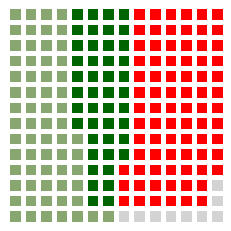

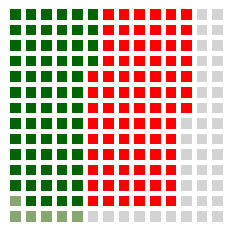

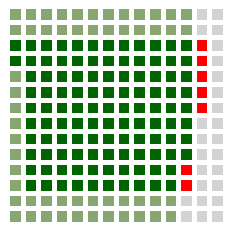

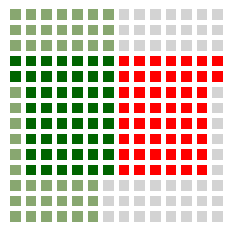

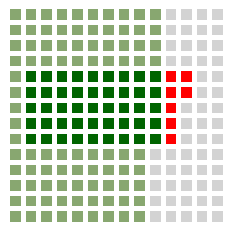

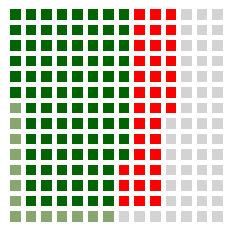

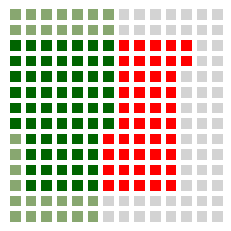

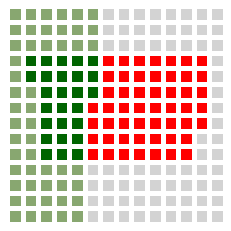

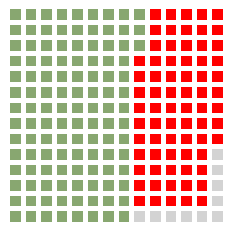

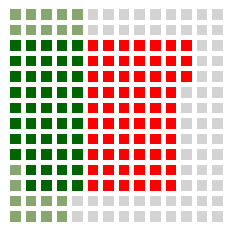

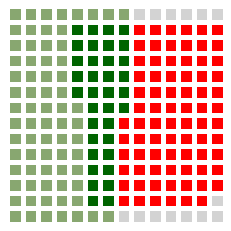

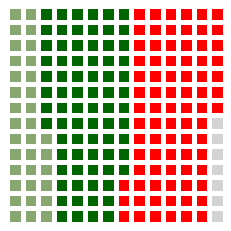

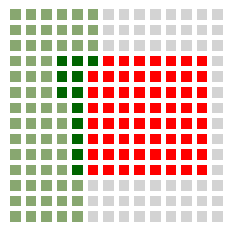

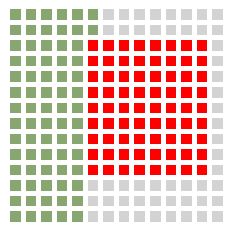

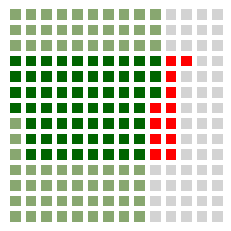

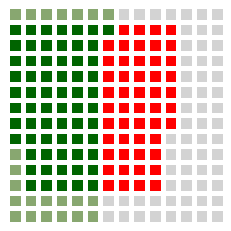

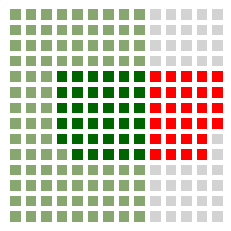

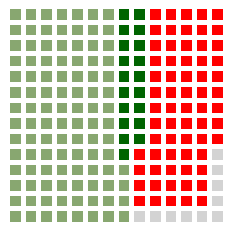

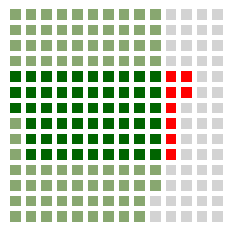

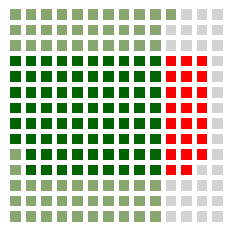

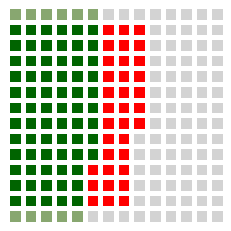

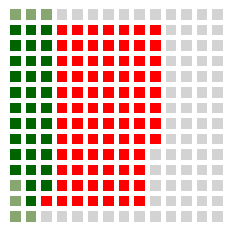

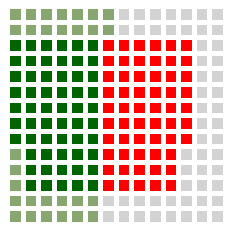

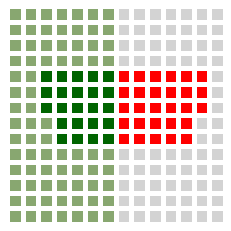

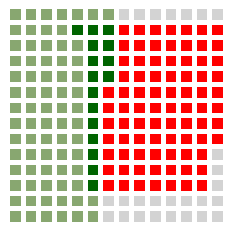

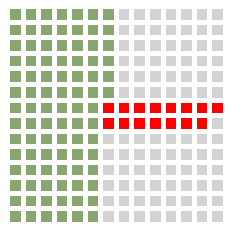

In [207]:
import random
random.seed(3)
rng = np.random.default_rng(seed=42)

def test_build_waffle_matrix(cols, rows, cm):
    hmap = build_waffle_matrix( (rows, cols), cm)
    plot_waffle_matrix(hmap)
    tn, fp, fn, tp = cm.ravel()
    values, counts = np.unique(hmap, return_counts=True)
    result_counts = [0] * 4
    for v, c in zip(values, counts):        
        result_counts[int(v)-1] = c
        
    ordered_vector = [fn, tp, fp, tn]
    normalized_vect =  ordered_vector / sum(ordered_vector) * cols * rows

    print(normalized_vect)
    print(result_counts)
    print(f"counts sum = {sum(result_counts)} - cols x rows = { cols * rows} ")
    max_error = np.max(np.abs(normalized_vect - result_counts))    
    assert max_error < 2.0, f" max_error = {max_error}"

for i in range(60):
    cols = 14 #random.randint(5, 15)
    rows = 14   #random.randint(5, 15)
    print( (rows, cols))
    cm = rng.integers(low=0, high=15, size=(2, 2))
    print(cm)
    
    test_build_waffle_matrix(cols, rows, cm)
    

In [189]:
cm


array([[ 6, 12],
       [ 1, 10]])

In [ ]:
max( tp/col_part, fp / (cols - col_part))

In [ ]:
(tp/col_part, fp / (cols - col_part))

In [ ]:
col_part